# Grades of Students dataset

### Problem Statement:

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

### Columns Description    --  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

### Predict:

CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.value_counts()

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  ME-107  CS-107  HS-205/20  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  CS-214  EE-217  CS-212  CS-215  MT-331  EF-303  HS-304  CS-301  CS-302  TC-383  MT-442  EL-332  CS-318  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  CS-423  CS-412  CGPA 
CS-97001  B-      D+      C-      C          C-      D+      D       C-      B-      C-      C-      B+         D       A-      B-      C+      D+      D+      D       A       D       C-      C       C-      C+      B       C       C+      B+      C       C-      C       C-      C-      C-      C-      A-      A       C-      B       A-      2.205    1
CS-97217  B-      A-      A-      A          C       A-      A-      A-      C+      C       A-      A-         A-      A-      B+      B-      C+      C-      B+      A-      C+      C       B-      D+      A-      B-      B+      C+      A-      C+      B+      B+      B-      B-      C      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [7]:
for i in df.columns:
    df[f'{i}'] = df[f'{i}'].fillna(df[f'{i}'].mode()[0])

In [8]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [9]:
# Checking number of unique values in each column
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [10]:
# checking for empty spaces
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().any()

False

In [11]:
df.replace("I","F", inplace=True)
df.replace("W","WU",inplace=True)

In [12]:
l=["A+","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","F","WU"]
r=14
for i in l:
    df.replace(f"{i}",r,inplace=True)
    r=r-1

In [13]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,9,5,6,7,6,5,4,6,9,...,6,6,6,6,12,13,6,10,12,2.205
1,CS-97002,13,4,5,4,9,7,4,13,5,...,5,4,7,4,12,9,7,7,10,2.008
2,CS-97003,13,10,13,9,11,13,9,11,12,...,10,10,13,7,13,13,13,12,13,3.608
3,CS-97004,4,8,5,4,4,12,5,6,4,...,5,7,5,6,9,10,8,8,8,1.906
4,CS-97005,12,12,12,11,13,13,12,11,13,...,9,11,11,9,12,13,12,12,13,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,10,13,13,12,14,13,12,12,14,...,12,12,13,13,13,11,11,10,13,3.798
567,CS-97568,14,13,13,13,13,13,13,12,13,...,11,11,13,13,12,10,12,7,12,3.772
568,CS-97569,10,13,12,11,13,13,13,13,13,...,12,10,13,11,13,7,11,12,12,3.470
569,CS-97570,13,11,4,13,4,5,9,6,9,...,4,10,10,6,4,7,10,9,7,2.193


In [14]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,10.022767,8.807356,10.805604,9.642732,9.968476,10.994746,9.838879,9.922942,10.021016,9.070053,...,10.000000,9.064799,10.406305,8.488616,10.907180,11.308231,10.059545,9.917688,10.847636,2.954888
std,2.961953,2.728282,2.830728,3.120705,2.867064,2.500872,2.566032,2.964885,2.485660,3.067429,...,3.327187,2.605191,2.621014,2.647964,2.342618,2.300172,2.215565,2.626161,2.213889,0.620552
min,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.800000
25%,8.000000,7.000000,9.500000,7.000000,8.000000,10.000000,9.000000,8.000000,8.000000,6.000000,...,7.000000,7.000000,9.000000,7.000000,10.000000,10.500000,9.000000,8.000000,10.000000,2.538000
50%,11.000000,9.000000,12.000000,10.000000,11.000000,12.000000,10.000000,11.000000,11.000000,9.000000,...,11.000000,9.000000,11.000000,9.000000,12.000000,12.000000,10.000000,11.000000,12.000000,3.029000
75%,12.000000,11.000000,13.000000,12.000000,12.000000,13.000000,12.000000,12.000000,12.000000,12.000000,...,13.000000,11.000000,13.000000,10.000000,12.000000,13.000000,12.000000,12.000000,12.000000,3.451000
max,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,3.985000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    int64  
 2   HS-101     571 non-null    int64  
 3   CY-105     571 non-null    int64  
 4   HS-105/12  571 non-null    int64  
 5   MT-111     571 non-null    int64  
 6   CS-105     571 non-null    int64  
 7   CS-106     571 non-null    int64  
 8   EL-102     571 non-null    int64  
 9   EE-119     571 non-null    int64  
 10  ME-107     571 non-null    int64  
 11  CS-107     571 non-null    int64  
 12  HS-205/20  571 non-null    int64  
 13  MT-222     571 non-null    int64  
 14  EE-222     571 non-null    int64  
 15  MT-224     571 non-null    int64  
 16  CS-210     571 non-null    int64  
 17  CS-211     571 non-null    int64  
 18  CS-203     571 non-null    int64  
 19  CS-214     571 non-null    int64  
 20  EE-217    

In [16]:
df.skew()

PH-121      -0.786896
HS-101      -0.179961
CY-105      -1.272690
HS-105/12   -0.478618
MT-111      -0.714075
CS-105      -1.117788
CS-106      -0.911267
EL-102      -0.712613
EE-119      -0.742163
ME-107      -0.318497
CS-107      -0.527827
HS-205/20   -1.362195
MT-222      -0.323695
EE-222      -0.988733
MT-224      -0.613648
CS-210      -0.998975
CS-211      -0.223293
CS-203      -0.438417
CS-214      -0.037992
EE-217      -0.929325
CS-212      -0.586715
CS-215      -0.286970
MT-331      -0.794481
EF-303      -0.313313
HS-304      -0.717684
CS-301      -0.587695
CS-302      -0.905432
TC-383      -0.438540
MT-442      -1.111297
EL-332      -0.662987
CS-318      -0.543863
CS-306      -0.700550
CS-312      -0.385737
CS-317      -0.258803
CS-403      -0.722310
CS-421      -0.389166
CS-406      -1.941256
CS-414      -1.869000
CS-419      -0.757268
CS-423      -0.771018
CS-412      -1.894737
CGPA        -0.497203
dtype: float64

### Visualisation

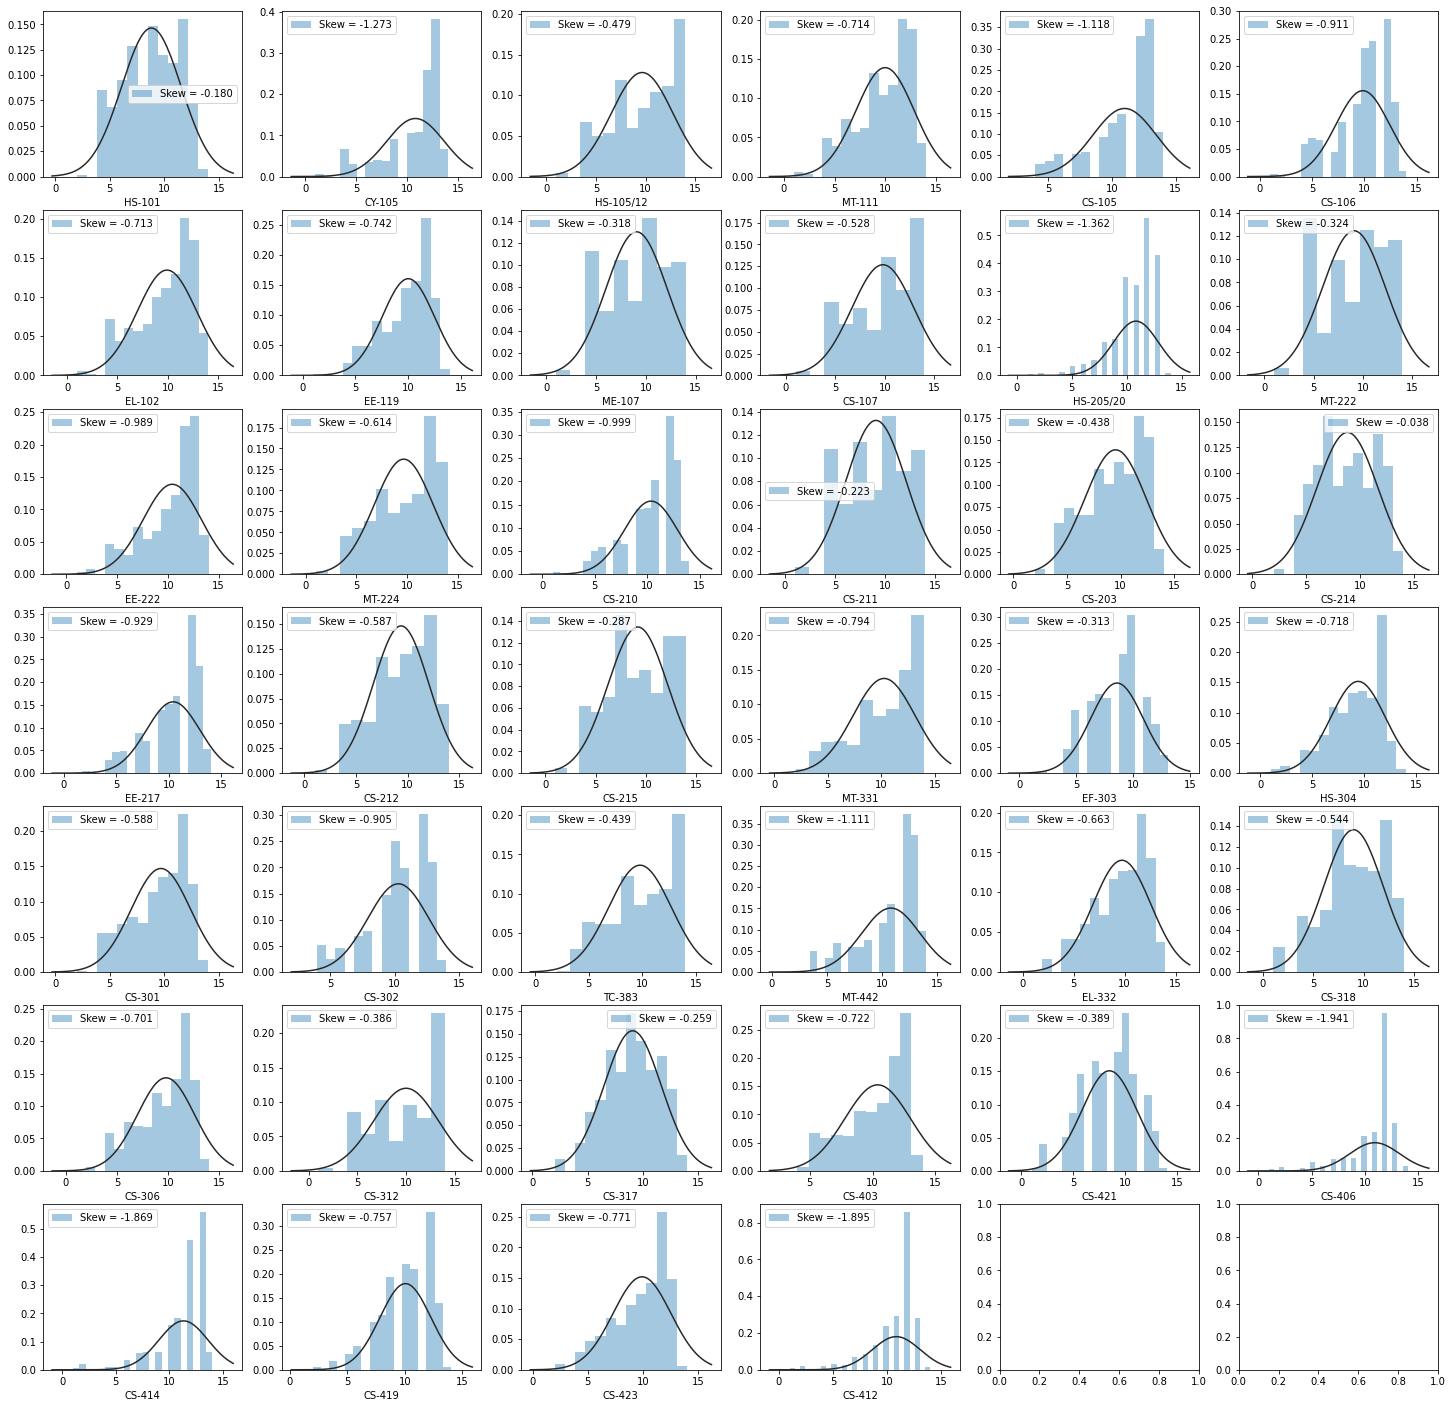

In [17]:
#plotting a histogram of each independent feature for visualization
cols = df.iloc[:,2:-1].columns
fig,ax = plt.subplots(7,6, figsize=(25, 25))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

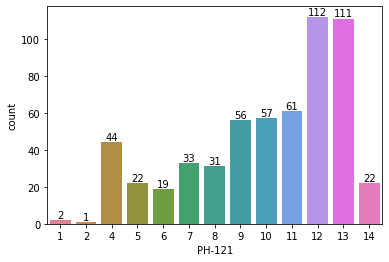

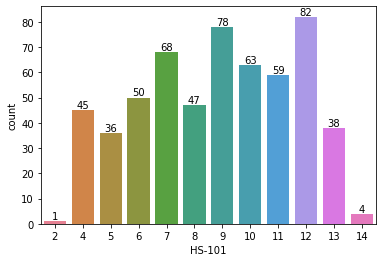

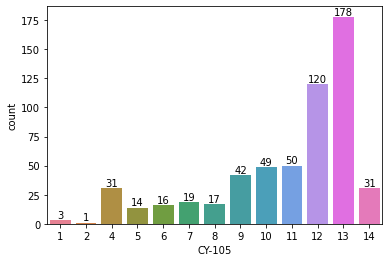

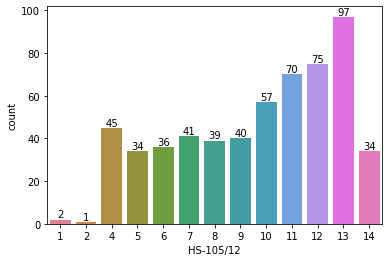

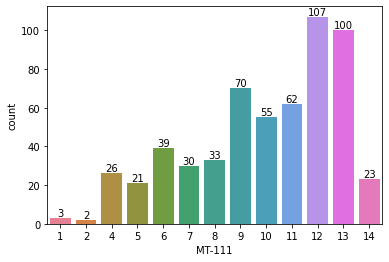

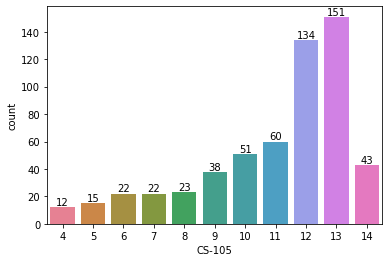

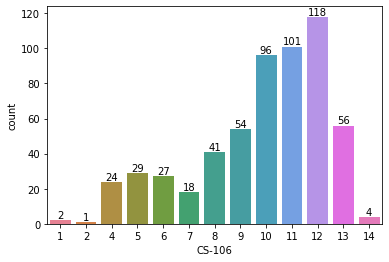

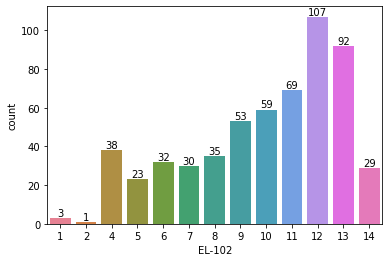

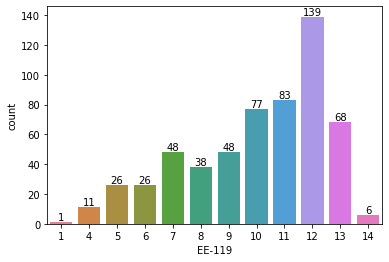

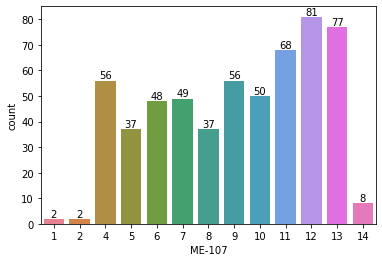

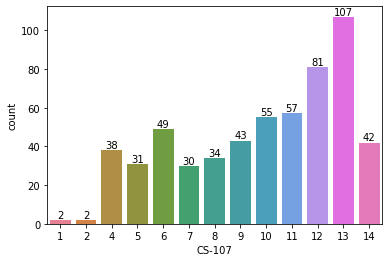

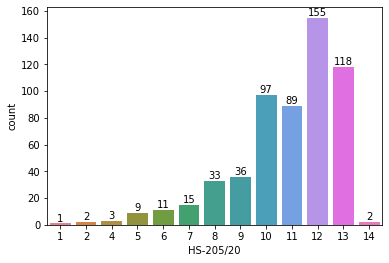

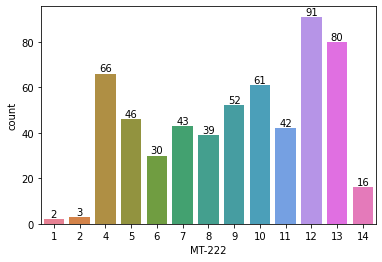

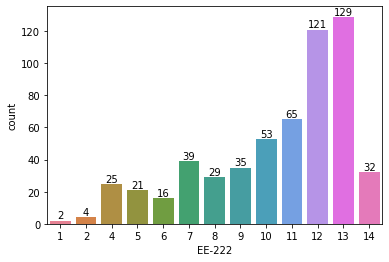

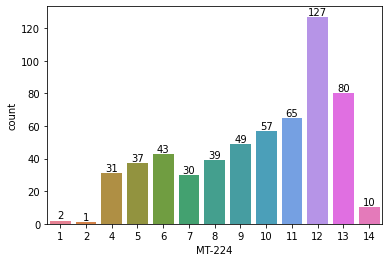

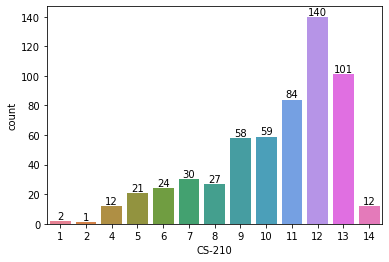

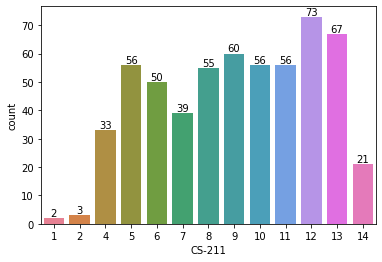

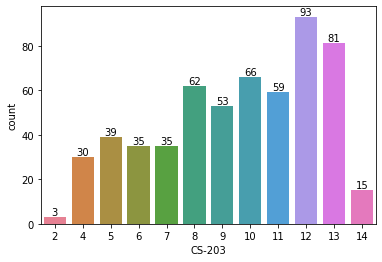

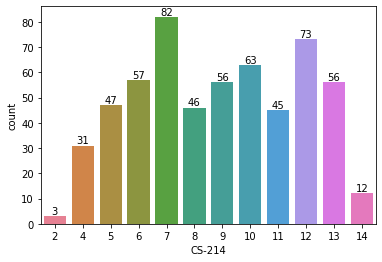

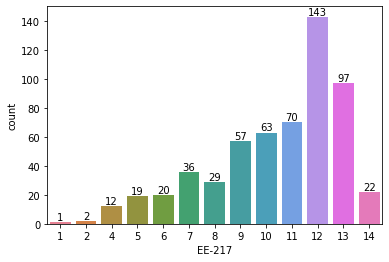

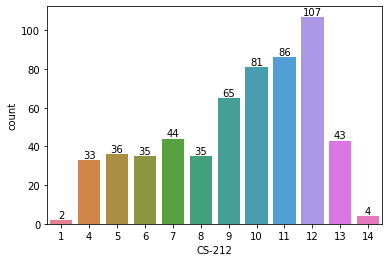

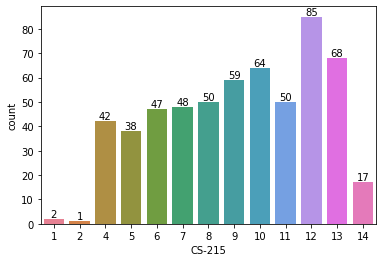

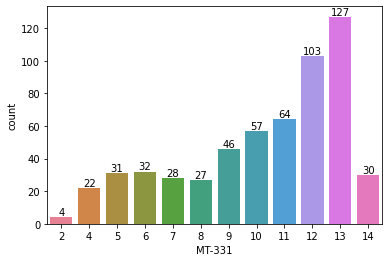

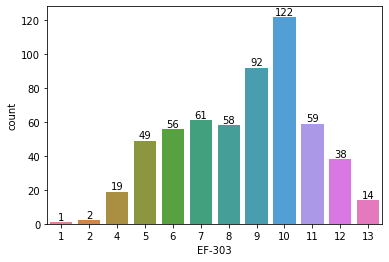

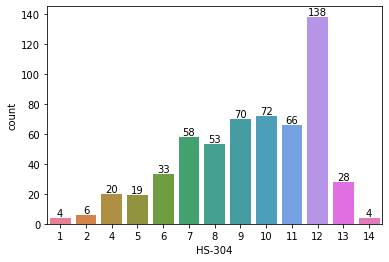

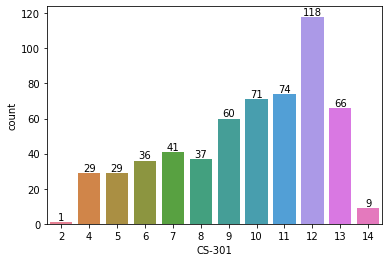

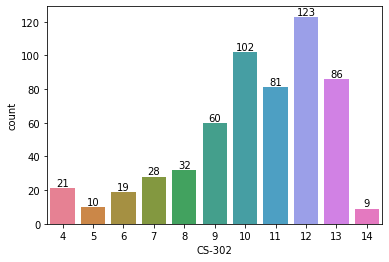

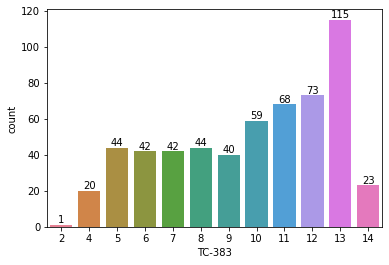

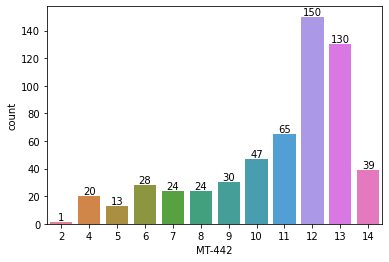

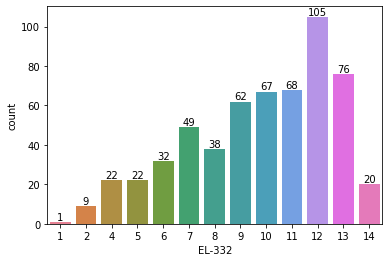

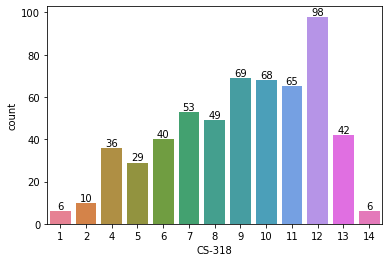

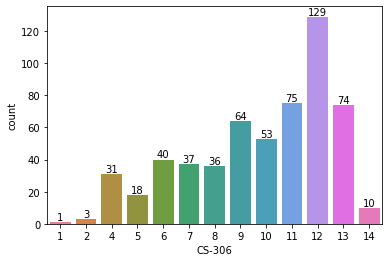

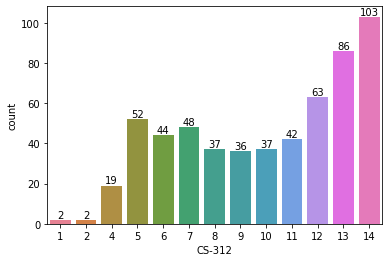

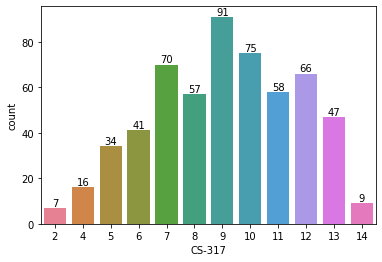

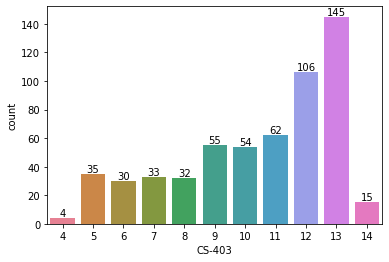

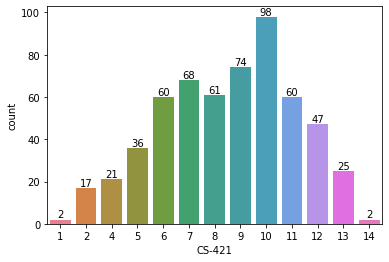

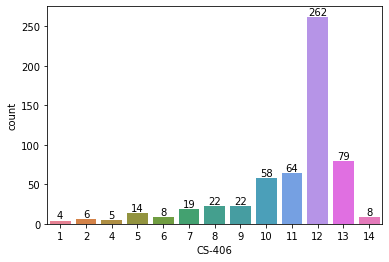

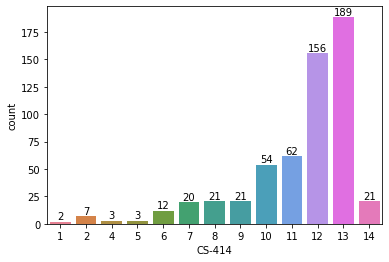

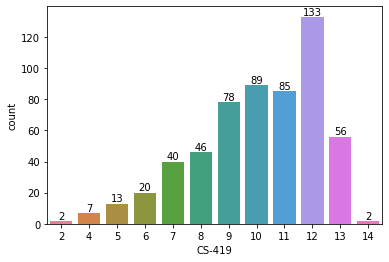

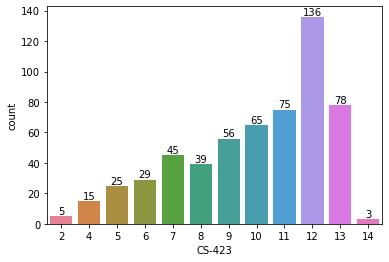

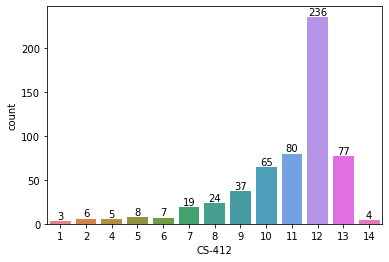

In [66]:
for i in df.columns[1:-1]:
    plt.figure(i)
    ax= sns.countplot(x=i,data=df,palette="husl")
    plt.bar_label(ax.containers[0])
    plt.show()
    #print(dfmode[i].value_counts().to_frame().T)

In [18]:
dfn=df.drop('Seat No.',axis=1)
dfn

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,9,5,6,7,6,5,4,6,9,6,...,6,6,6,6,12,13,6,10,12,2.205
1,13,4,5,4,9,7,4,13,5,4,...,5,4,7,4,12,9,7,7,10,2.008
2,13,10,13,9,11,13,9,11,12,12,...,10,10,13,7,13,13,13,12,13,3.608
3,4,8,5,4,4,12,5,6,4,8,...,5,7,5,6,9,10,8,8,8,1.906
4,12,12,12,11,13,13,12,11,13,12,...,9,11,11,9,12,13,12,12,13,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,10,13,13,12,14,13,12,12,14,11,...,12,12,13,13,13,11,11,10,13,3.798
567,14,13,13,13,13,13,13,12,13,13,...,11,11,13,13,12,10,12,7,12,3.772
568,10,13,12,11,13,13,13,13,13,10,...,12,10,13,11,13,7,11,12,12,3.470
569,13,11,4,13,4,5,9,6,9,6,...,4,10,10,6,4,7,10,9,7,2.193


In [19]:
# removing skewness

for i in dfn.columns:   
    if abs(dfn[f"{i}"].skew())>=1:
        dfn[f"{i}"]=stats.boxcox(dfn[f"{i}"])[0]
        print(i,"--",dfn[f"{i}"].skew())

CY-105 -- -0.5120630517834858
CS-105 -- -0.3657402431443214
HS-205/20 -- -0.296836304887952
MT-442 -- -0.3952853480122299
CS-406 -- -0.5425745197315998
CS-414 -- -0.5012898097134056
CS-412 -- -0.46989744925608523


In [20]:
dfn.skew()

PH-121      -0.786896
HS-101      -0.179961
CY-105      -0.512063
HS-105/12   -0.478618
MT-111      -0.714075
CS-105      -0.365740
CS-106      -0.911267
EL-102      -0.712613
EE-119      -0.742163
ME-107      -0.318497
CS-107      -0.527827
HS-205/20   -0.296836
MT-222      -0.323695
EE-222      -0.988733
MT-224      -0.613648
CS-210      -0.998975
CS-211      -0.223293
CS-203      -0.438417
CS-214      -0.037992
EE-217      -0.929325
CS-212      -0.586715
CS-215      -0.286970
MT-331      -0.794481
EF-303      -0.313313
HS-304      -0.717684
CS-301      -0.587695
CS-302      -0.905432
TC-383      -0.438540
MT-442      -0.395285
EL-332      -0.662987
CS-318      -0.543863
CS-306      -0.700550
CS-312      -0.385737
CS-317      -0.258803
CS-403      -0.722310
CS-421      -0.389166
CS-406      -0.542575
CS-414      -0.501290
CS-419      -0.757268
CS-423      -0.771018
CS-412      -0.469897
CGPA        -0.497203
dtype: float64

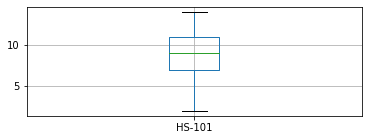

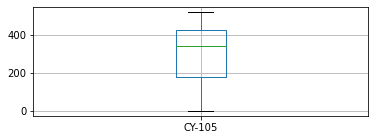

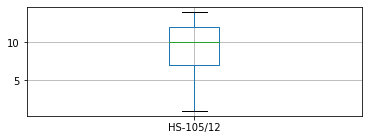

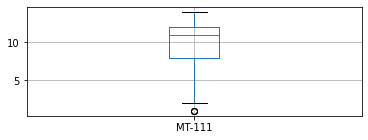

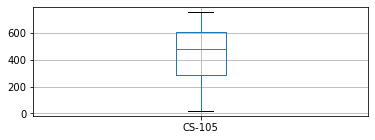

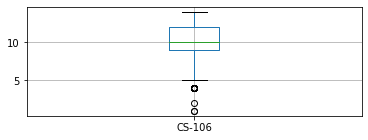

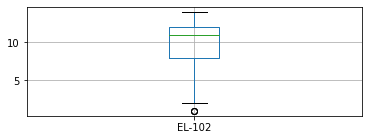

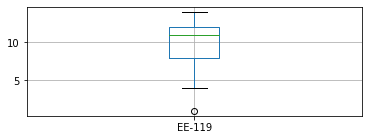

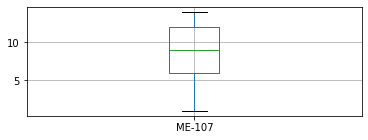

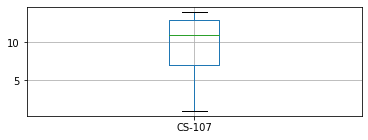

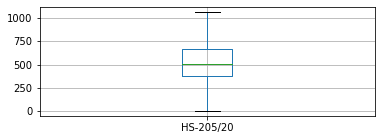

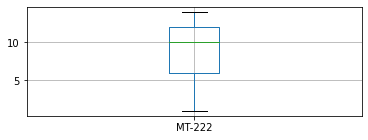

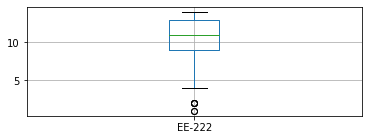

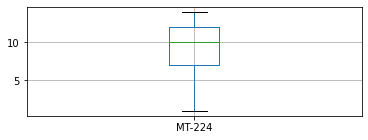

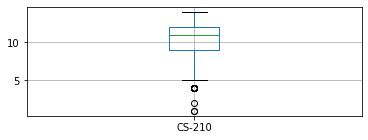

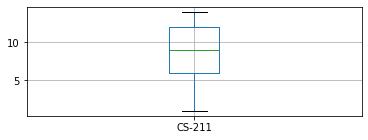

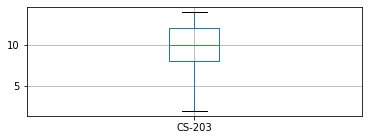

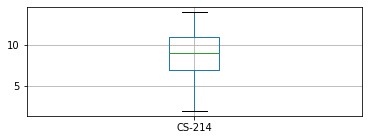

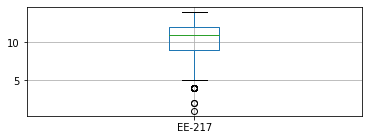

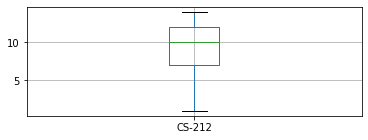

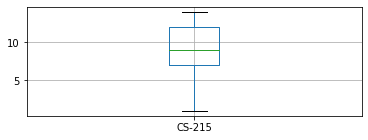

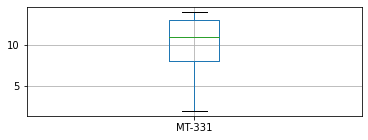

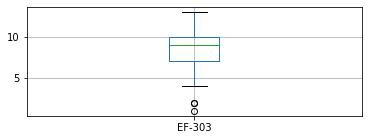

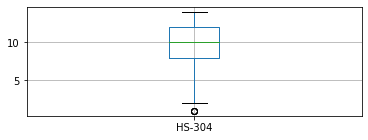

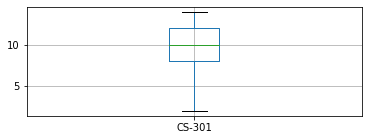

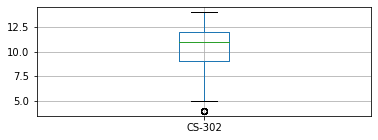

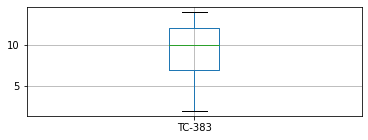

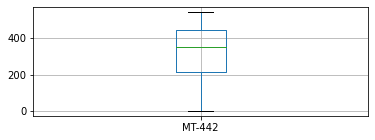

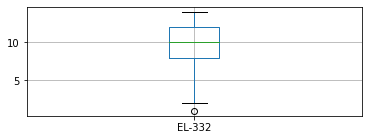

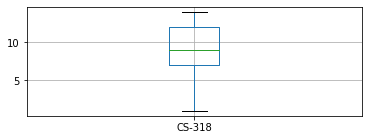

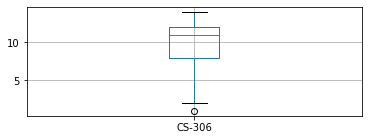

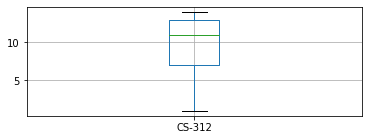

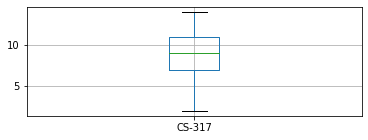

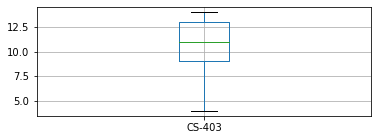

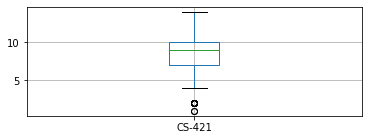

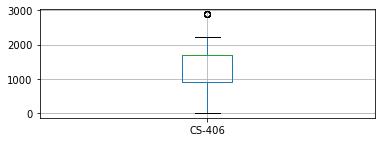

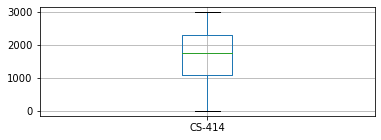

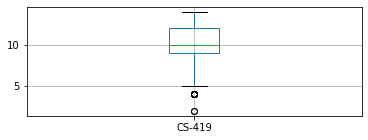

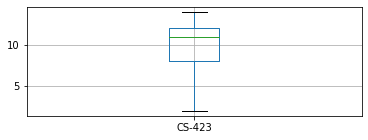

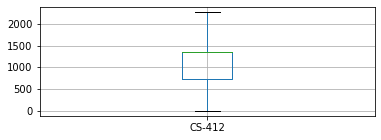

In [21]:
# to check for outliers
for column in dfn.iloc[:,1:-1]:
    plt.figure(figsize=(6,2))
    dfn.boxplot([column])

In [67]:
#Outliers Treatment
z=np.abs(zscore(dfn))
dfn=dfn[(z<3).all(axis=1)]
dfn

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,9,5,50.024622,7,6,37.202651,4,6,9,6,...,6,6,6,6,1687.435883,2319.003606,6,10,1345.846780,2.205
1,13,4,30.140626,4,9,99.880939,4,13,5,4,...,5,4,7,4,1687.435883,637.521116,7,7,725.132983,2.008
2,13,10,422.985137,9,11,609.873399,9,11,12,12,...,10,10,13,7,2232.044041,2319.003606,13,12,1765.604528,3.608
3,4,8,30.140626,4,4,482.766018,5,6,4,8,...,5,7,5,6,617.402449,922.989289,8,8,340.098438,1.906
4,12,12,339.265495,11,13,609.873399,12,11,13,12,...,9,11,11,9,1687.435883,2319.003606,12,12,1765.604528,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,12,4,422.985137,7,11,374.435772,7,12,9,4,...,10,8,11,5,256.412038,153.346594,10,7,507.203507,2.607
566,10,13,422.985137,12,14,609.873399,12,12,14,11,...,12,12,13,13,2232.044041,1289.891633,11,10,1765.604528,3.798
567,14,13,422.985137,13,13,609.873399,13,12,13,13,...,11,11,13,13,1687.435883,922.989289,12,7,1345.846780,3.772
568,10,13,339.265495,11,13,609.873399,13,13,13,10,...,12,10,13,11,2232.044041,263.659311,11,12,1345.846780,3.470


<AxesSubplot:>

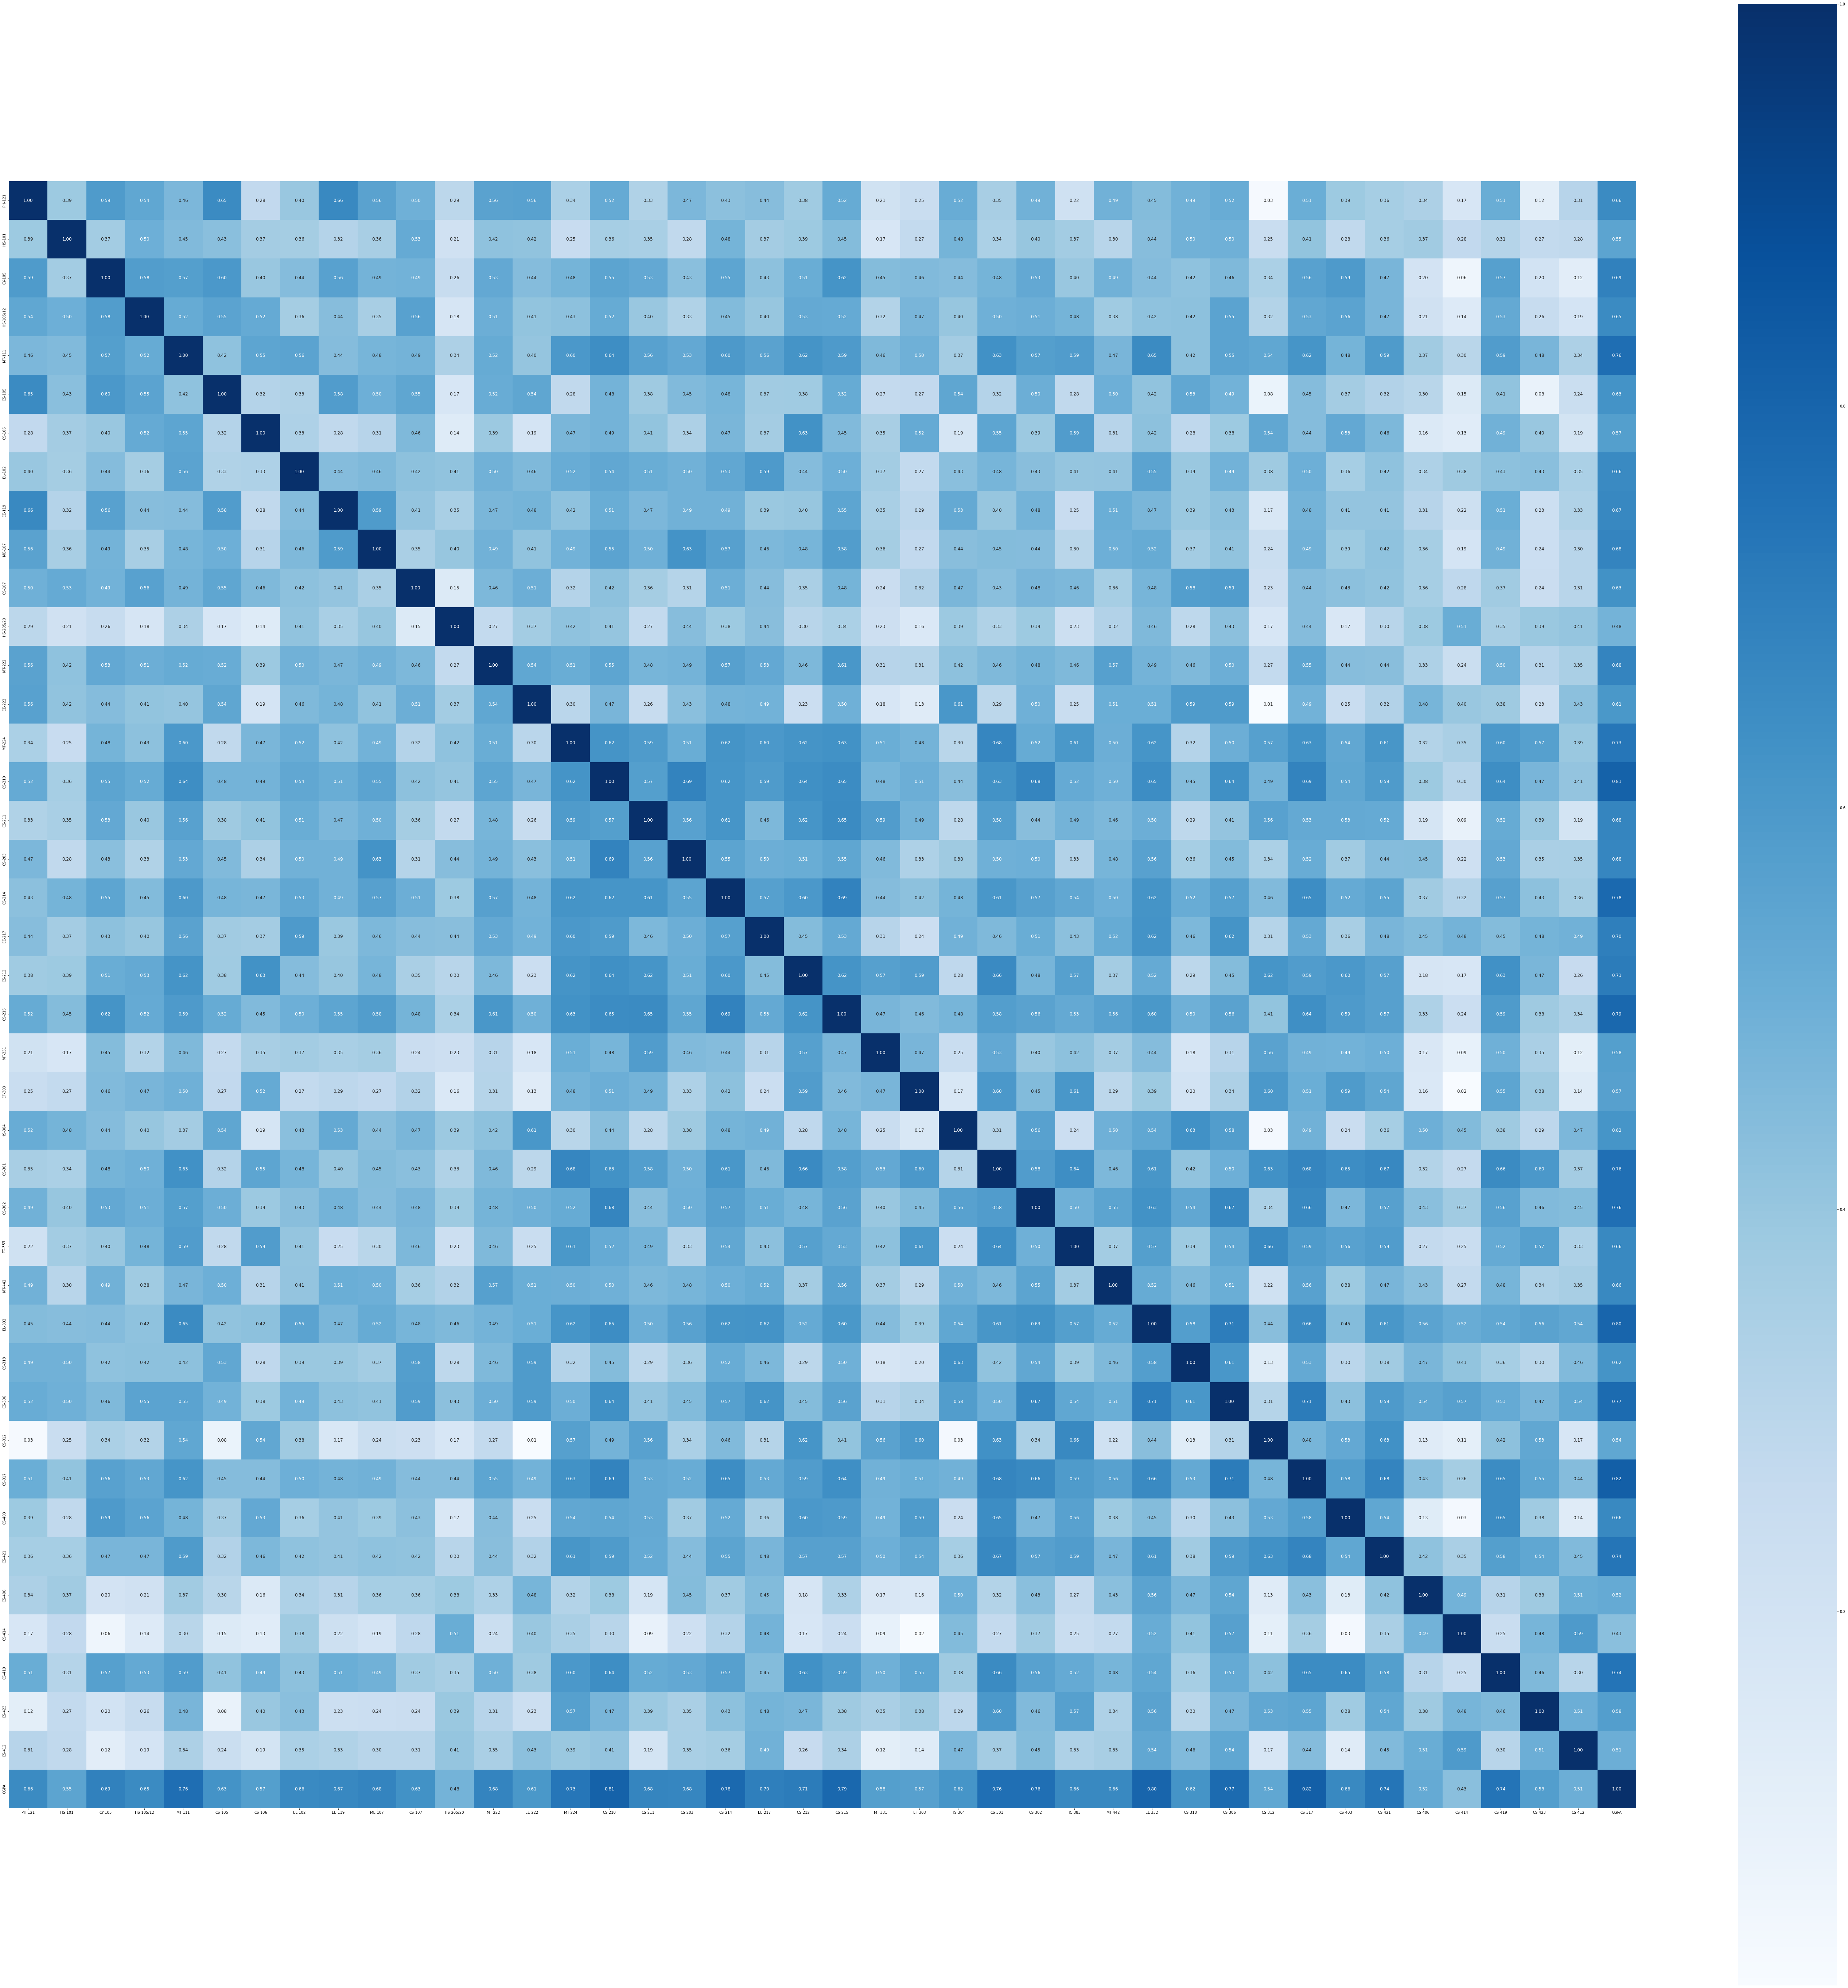

In [23]:
# To find multicolinearity

correlation=dfn.corr()
plt.figure(figsize=(100,100))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':12},cmap="Blues")

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(dfn.iloc[:,:-1].values,i) for i in range(dfn.iloc[:,:-1].shape[1])]
vif["features"]=dfn.iloc[:,:-1].columns
print(vif)

    VIF Factor   features
0    45.459893     PH-121
1    23.585992     HS-101
2    14.684849     CY-105
3    30.454981  HS-105/12
4    43.119206     MT-111
5    15.422938     CS-105
6    38.707200     CS-106
7    29.367838     EL-102
8    46.043493     EE-119
9    25.162192     ME-107
10   31.192495     CS-107
11   12.195871  HS-205/20
12   23.094216     MT-222
13   38.282968     EE-222
14   43.342250     MT-224
15   74.347196     CS-210
16   32.364064     CS-211
17   38.299504     CS-203
18   33.729590     CS-214
19   50.966733     EE-217
20   46.802778     CS-212
21   36.634686     CS-215
22   29.097040     MT-331
23   37.033261     EF-303
24   43.714631     HS-304
25   51.568616     CS-301
26   57.663282     CS-302
27   41.730792     TC-383
28   11.211183     MT-442
29   49.247231     EL-332
30   28.843720     CS-318
31   65.386760     CS-306
32   41.504712     CS-312
33   54.304784     CS-317
34   48.169361     CS-403
35   37.166932     CS-421
36   13.106237     CS-406
37   17.3585

In [25]:
# Reducing the dimensionality of our dataset using PCA
pca = PCA()
pca.fit(dfn.iloc[:,1:-1])

PCA()

In [26]:
#To find the variance explained by different components
pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,41)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40
Explained Variance,838895.78,234896.63,115957.05,52974.89,36263.33,12629.47,9017.91,40.79,11.36,9.99,...,1.86,1.8,1.77,1.67,1.55,1.49,1.39,1.27,1.14,1.04


In [27]:
pca = PCA(n_components = 3)
dfx = pca.fit_transform(dfn.iloc[:,1:-1])
dfx

array([[ -684.13375818,  -249.97380102,   -95.93668793],
       [  829.28826779,   764.54626879,  -131.62044693],
       [-1226.2917121 ,   264.59600639,   197.06173952],
       ...,
       [  486.46836757,  1503.46319446,   458.82149087],
       [ 2201.66849037,  -311.51321592,   -41.21317582],
       [ 2313.52450974,  -248.61568426,   -63.97440922]])

In [30]:
x=dfn.drop('CGPA',axis=1)

In [29]:
y=dfn.loc[:,'CGPA']


In [31]:
x.shape

(551, 41)

In [32]:
y.shape

(551,)

# Model Training and Testing

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [34]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9746858383297804
At random state 0,the testing accuracy is :- 0.9872617106941204



At random state 1,the training accuracy is :- 0.9745176414125399
At random state 1,the testing accuracy is :- 0.9907744114951305



At random state 2,the training accuracy is :- 0.9747935836282577
At random state 2,the testing accuracy is :- 0.9897351289107686



At random state 3,the training accuracy is :- 0.9743418977541146
At random state 3,the testing accuracy is :- 0.9900045248884883



At random state 4,the training accuracy is :- 0.973846195102633
At random state 4,the testing accuracy is :- 0.991297471441627



At random state 5,the training accuracy is :- 0.9762786793610182
At random state 5,the testing accuracy is :- 0.9811009962562948



At random state 6,the training accuracy is :- 0.97485037844163
At random state 6,the testing accuracy is :- 0.9877004399074387



At random state 7,the training accuracy is :- 0.9745427977561202
At random state

At random state 85,the training accuracy is :- 0.9757002823014581
At random state 85,the testing accuracy is :- 0.9845863997118403



At random state 86,the training accuracy is :- 0.9941013559451423
At random state 86,the testing accuracy is :- 0.9011950816742402



At random state 87,the training accuracy is :- 0.9930385118842293
At random state 87,the testing accuracy is :- 0.9116917793592864



At random state 88,the training accuracy is :- 0.9748248579312365
At random state 88,the testing accuracy is :- 0.9872247523527325



At random state 89,the training accuracy is :- 0.974181942031324
At random state 89,the testing accuracy is :- 0.9907319613798017



At random state 90,the training accuracy is :- 0.9760748307727778
At random state 90,the testing accuracy is :- 0.9833254015697365



At random state 91,the training accuracy is :- 0.9753506173798918
At random state 91,the testing accuracy is :- 0.9885822492055266



At random state 92,the training accuracy is :- 0.97440510631234

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)


In [36]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [38]:
print (r2_score(y_test,pred_test))

0.9064864278719923


## CROSS VALIDATION OF THE LINEAR REGRESSION MODEL

In [39]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_lr)

In [40]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 95.46831925463609
Accuracy_score is :- 90.64864278719924


At cv:- 5
Cross validation score is :- 96.96292465427857
Accuracy_score is :- 90.64864278719924


At cv:- 6
Cross validation score is :- 96.7423817817802
Accuracy_score is :- 90.64864278719924


At cv:- 7
Cross validation score is :- 96.65584571711854
Accuracy_score is :- 90.64864278719924


At cv:- 8
Cross validation score is :- 96.7324295284232
Accuracy_score is :- 90.64864278719924


At cv:- 9
Cross validation score is :- 96.9036469080292
Accuracy_score is :- 90.64864278719924




In [41]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.9696292465427856 
The accuracy_score is: 0.9064864278719923


## So accuracy score of Linear Regression is 90%

In [42]:
from sklearn import metrics

In [43]:
MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [44]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.04714778933528973
mean squared error: 0.03124255553763853


In [45]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.17675563792320326


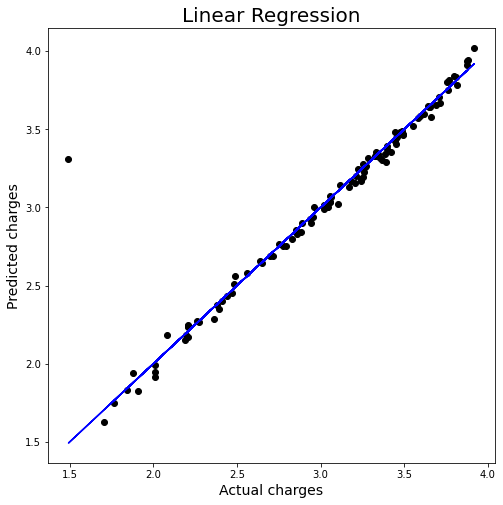

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

We can see that Most of the points falls on the best fit line which is good but some are scattered also

## Regression Algo.

In [47]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

R2_Score: 0.6817058261503004
cv :- 0.7639078561537622
MAE: 0.20516216216216213
MSE: 0.10634096396396397
RMSE: 0.3260996227596162


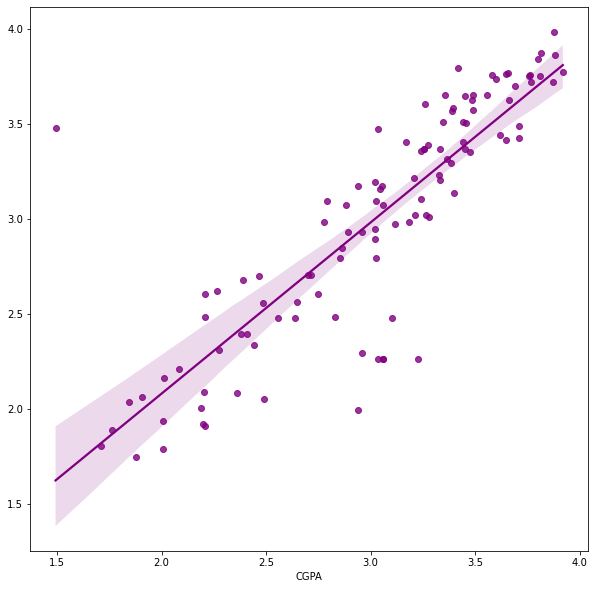

In [48]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
dt=r2_score(y_test,predDTR)
print('R2_Score:',dt)

print('cv :-' ,cross_val_score(DTR,x,y,cv=5).mean())
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predDTR,color="purple")
plt.show()

## In Decision Tree Regressor we got 89%

R2_Score: 0.6602941174198473
MAE: 0.24200720720720717
MSE: 0.11349454054054055
RMSE: 0.33688950791103683
cv :- 0.6216958005884483


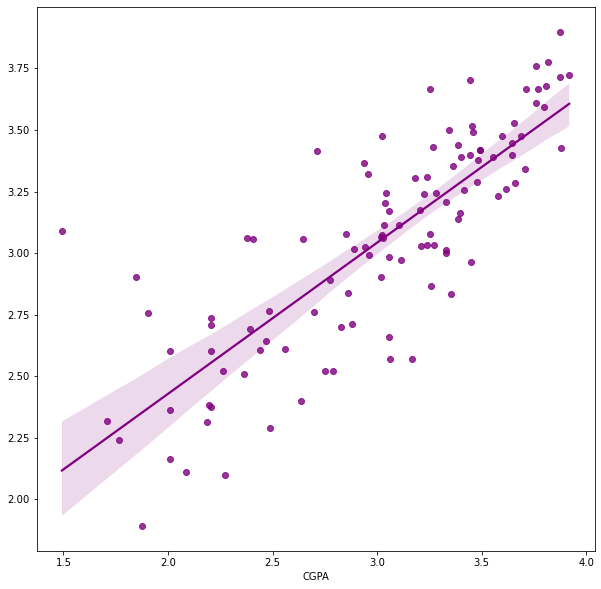

In [49]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)

predkn=kn.predict(x_test)
print('R2_Score:',r2_score(y_test,predkn))
print('MAE:',metrics.mean_absolute_error(y_test, predkn))
print('MSE:',metrics.mean_squared_error(y_test, predkn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predkn)))
print('cv :-' ,cross_val_score(kn,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

# Ensemble Technique 

R2_Score: 0.8833718909105028
MAE: 0.0921184684684684
MSE: 0.03896504103693691
RMSE: 0.19739564594219627
cv :- 0.9332973506595177


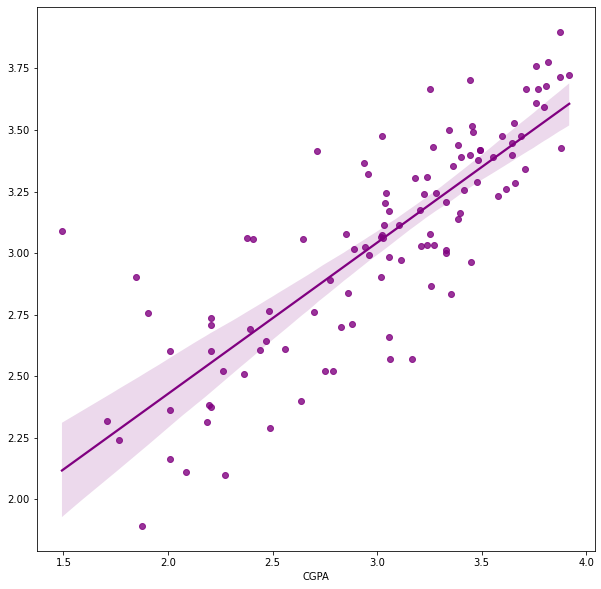

In [50]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('cv :-' ,cross_val_score(RF,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

## In Random Forest Regressor we got 93% 

gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

#prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))
print('cv :-' ,cross_val_score(gb,x,y,cv=5).mean())

#Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

R2_Score: 0.8825764081002109
cv :- 0.9423678506918771
MAE: 0.08570243243243256
MSE: 0.03923080904594593
RMSE: 0.19806768804109856


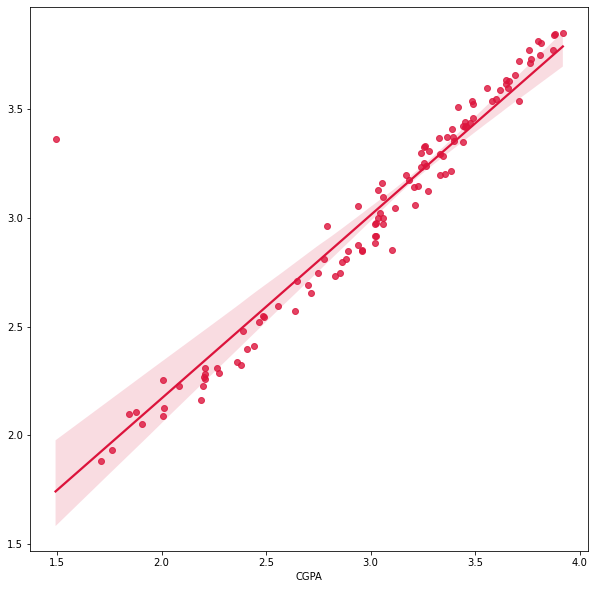

In [52]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
etr=r2_score(y_test,predXT)
print('R2_Score:',etr)

print('cv :-' ,cross_val_score(XT,x,y,cv=5).mean())


# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Visualizing the predicted values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predXT,color="crimson")
plt.show()

## Making a dataframe of all the models accuracy score

In [53]:
MA=pd.DataFrame([["LR","92%"],["Decision Tree Regressor","90%"],["KNeighbors Regressor","91%"],["Random Forest Regressor","90%"],["Gradient Boosting","91%"],["Extra Tree Classifier","92%"]],
                    columns=["Model_Name","AccuracyScore"])

MA

,Model_Name,AccuracyScore
0,LR,92%
1,Decision Tree Regressor,90%
2,KNeighbors Regressor,91%
3,Random Forest Regressor,90%
4,Gradient Boosting,91%
5,Extra Tree Classifier,92%


## Hyper parameter tuning

In [54]:
XT.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
#Extra Trees regressor
parameters = {'bootstrap': [False,True],
             'max_features':['auto', 'sqrt', 'log2'],
             'criterion': ['squared_error','absolute_error'],
             'warm_start':[True,False]}

In [56]:
from sklearn.model_selection import GridSearchCV


In [57]:
gg=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)


In [58]:
gg.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [59]:
gg.best_params_


{'bootstrap': False,
 'criterion': 'squared_error',
 'max_features': 'sqrt',
 'warm_start': False}

In [60]:
gb = ExtraTreesRegressor(criterion='squared_error', warm_start=True, max_features='auto',bootstrap=False)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 88.54978456093805


Now save that Model

In [61]:
#Saving the model using .pkl
import joblib
joblib.dump(gb,"Grades.pkl")

['Grades.pkl']

In [62]:
#Loading the saved model
aa=joblib.load("Grades.pkl")

In [63]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([3.16885, 3.80106, 2.86977, 2.31668, 3.15591, 1.85792, 3.72567,
       2.24972, 2.91837, 3.55626, 2.47076, 2.33607, 3.20324, 3.28626,
       3.49477, 2.71457, 3.75104, 3.38228, 1.92485, 2.25112, 2.94202,
       3.13222, 3.25114, 3.63423, 2.10107, 3.42103, 3.22067, 3.66258,
       2.87261, 2.18078, 2.99393, 3.35967, 2.99438, 2.5915 , 3.49827,
       2.8499 , 2.24739, 3.3393 , 3.17162, 3.25948, 2.81626, 3.7977 ,
       2.59563, 3.06548, 3.37723, 2.98379, 3.15441, 2.73419, 2.64665,
       2.3787 , 2.13764, 2.86682, 3.2901 , 3.35092, 3.58677, 2.23865,
       3.72146, 2.67994, 3.26194, 3.58933, 3.28302, 3.30221, 2.54441,
       3.40598, 3.61628, 2.59059, 3.13127, 2.99339, 3.59831, 3.8446 ,
       3.51163, 3.53097, 2.89827, 3.77511, 2.91422, 2.91629, 3.34096,
       3.07894, 2.05431, 2.79756, 3.52577, 3.40762, 3.5761 , 3.86132,
       3.24511, 2.32584, 3.84309, 2.63716, 2.52007, 3.35681, 3.36892,
       2.28485, 3.40644, 3.76752, 3.11051, 2.9913 , 3.4518 , 2.30057,
       2.02065, 3.29

In [64]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
Predicted,3.16885,3.80106,2.86977,2.31668,3.15591,1.85792,3.72567,2.24972,2.91837,3.55626,...,2.96001,2.27123,2.44694,2.96815,2.10387,2.44553,3.04033,3.09132,3.61549,2.84881
Original,3.18200,3.79800,2.77600,2.20600,3.03700,1.70800,3.76900,2.26400,3.01900,3.48500,...,2.79100,2.00800,2.44200,3.04300,2.00900,2.40800,3.03300,3.27200,3.66200,2.89100
